### How to know index names in ElasticSearch ?

https://kibana.atgameshosting.com/

Management -> Elasticsearch -> Index Managemen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pprint
from elasticsearch import Elasticsearch

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

# create a .env in your preferred directory
# sample content of the .env file:
ELASTICSEARCH_HOST=38.64.85.1<br/>
ELASTICSEARCH_PORT=9200<br/>
ELASTICSEARCH_ACCOUNT=david.chou<br/>
ELASTICSEARCH_PASSWORD=IWONTTELLYOU

In [49]:
%load_ext dotenv
%dotenv /Users/dchou/.env

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [50]:
HOST = os.getenv("ELASTICSEARCH_HOST")
PORT = os.getenv("ELASTICSEARCH_PORT")
ACCOUNT = os.getenv("ELASTICSEARCH_ACCOUNT")
PASSWORD = os.getenv("ELASTICSEARCH_PASSWORD")

In [51]:
ACCOUNT

'david.chou'

In [52]:
es = Elasticsearch(
    [
        'https://' + ACCOUNT + ':' + PASSWORD + '@' + HOST + ':' + PORT + '/'
    ],
    ssl_show_warn=False,
    verify_certs=True,
    # provide a path to CA certs on disk
    ca_certs='/Users/dchou/elastic-certificates-ca.pem'
)

In [53]:
##es = Elasticsearch(hosts=[ELASTICSEARCH_IP]) # ELASTICSEARCH_IP is the ip of your Elasticsearch Server.
#index_name="filebeat-acnet-dev-*"
#index_name="filebeat-acnet-live-0.0.1-7.4.0-2019.12.15"
##query_str = '{"query":{"range":{"event_data.UtcTime":{"gte":"2019-01-01", "lte":"2020-02-27"}}}}'
#query_str = """{
#  "query": {
#    "match_phrase": {
#      "log_type.keyword": "game-play"
#    }
#  }
#}
#"""
#res = es.search(index=index_name, body=query_str, from_=0, size=10000) # DON'T SET SIZE=100000
#pprint.pprint(res['hits']['hits'])

<br>
#### Use Kibana UI to start
  * https://kibana.atgameshosting.com/app/kibana#/discover/c6915f80-5dd3-11ea-a466-05347817d7f6?_g=(filters:!(),refreshInterval:(pause:!t,value:0),time:(from:now-15d,to:now))&_a=(columns:!(log_at,log.timestamp,account.email,machine_uuid),filters:!(('$state':(store:appState),meta:(alias:!n,disabled:!f,index:c5f2dcd0-f17b-11e9-981f-e5daf0165e10,key:account.email,negate:!f,params:(query:'atgames.qa%2Bbent@gmail.com'),type:phrase),query:(match_phrase:(account.email:'atgames.qa%2Bbent@gmail.com'))),('$state':(store:appState),meta:(alias:!n,disabled:!f,index:c5f2dcd0-f17b-11e9-981f-e5daf0165e10,key:machine_uuid,negate:!f,params:(query:'88001911B0019068'),type:phrase),query:(match_phrase:(machine_uuid:'88001911B0019068')))),index:c5f2dcd0-f17b-11e9-981f-e5daf0165e10,interval:auto,query:(language:kuery,query:''),savedQuery:'Bent%20Chiropractics%20Clinic',sort:!(!('@timestamp',desc)))
  
<figure> 
<figcaption>**Kibana output**</figcaption>
<img src="./images/kibana_output.png"
     alt="kibana_output"
     style="float: left"/>   
</figure>
<br><br>

<p>notice the timezone information</p>

#### Get KQL from Kibana
- KQL: Kibana Query Language
- Inspect → Requests

<figure> 
<figcaption>**Get KQL from Kibana**</figcaption>
<img src="./images/get_KQL_from_kibana.png"
     alt="kibana_output"
     style="float: left"/>   
</figure>
<br><br>

### History for reference:

#### filter string for clinic machine:
      "filter": [
        {
          "match_all": {}
        },
        {
          "match_phrase": {
            "account.email": "atgames.qa+bent@gmail.com"
          }
        },
        {
          "match_phrase": {
            "machine_uuid": "88001911B0019068"
          }
        },
        {
          "range": {
            "@timestamp": {
              "gte": "2020-02-23T07:00:28.729Z",
              "lte": "2020-03-31T07:00:28.729Z",
              "format": "strict_date_optional_time"
            }
          }
        }
      ],
      
#### filter for 2@1.1
      "filter": [
        {
          "match_all": {}
        },
        {
          "match_phrase": {
            "account.email": "2@1.1"
          }
        },
        {
          "match_phrase": {
            "machine_uuid": "88001908A0489298"
          }
        },
        {
          "range": {
            "@timestamp": {
              "gte": "2020-02-23T07:00:28.729Z",
              "lte": "2020-03-31T07:00:28.729Z",
              "format": "strict_date_optional_time"
            }
          }
        }
      ],
      
#### filter for atgames.qa+139@gmail.com
      "filter": [
        {
          "match_all": {}
        },
        {
          "match_phrase": {
            "account.email": "atgames.qa+139@gmail.com"
          }
        },
        {
          "match_phrase": {
            "machine_uuid": "88009901Q0000158"
          }
        },
        {
          "range": {
            "@timestamp": {
              "gte": "2020-02-23T07:00:28.729Z",
              "lte": "2020-03-31T07:00:28.729Z",
              "format": "strict_date_optional_time"
            }
          }
        }
      ],
      
#### filter for HA880QATW00001F0
      "filter": [
        {
          "match_all": {}
        },
        {
          "match_phrase": {
            "account.email": "1@1.1"
          }
        },
        {
          "match_phrase": {
            "machine_uuid": "HA880QATW00001F0"
          }
        },
        {
          "range": {
            "@timestamp": {
              "gte": "2020-02-23T07:00:28.729Z",
              "lte": "2020-03-31T07:00:28.729Z",
              "format": "strict_date_optional_time"
            }
          }
        }
      ],



### Bent Chiropractics Clinic

- account.email: atgames.qa+bent@gmail.com
- machine_uuid:  88001911B0019068

In [349]:
index_name="filebeat-acnet-live-*"
#index_name="filebeat-acnet-live-0.0.1-7.4.0-2020.03.03"
query_str = """
{
  "version": true,
  "size": 500,
  "sort": [
    {
      "@timestamp": {
        "order": "desc",
        "unmapped_type": "boolean"
      }
    }
  ],
  "aggs": {
    "2": {
      "date_histogram": {
        "field": "@timestamp",
        "fixed_interval": "12h",
        "time_zone": "America/Los_Angeles",
        "min_doc_count": 1
      }
    }
  },
  "stored_fields": [
    "*"
  ],
  "script_fields": {},
  "docvalue_fields": [
    {
      "field": "@timestamp",
      "format": "date_time"
    },
    {
      "field": "account.created_date",
      "format": "date_time"
    },
    {
      "field": "account.current_sign_in_at",
      "format": "date_time"
    },
    {
      "field": "activity.binding_info.binding_info.binding_at",
      "format": "date_time"
    },
    {
      "field": "activity.binding_info.binding_info.created_at",
      "format": "date_time"
    },
    {
      "field": "activity.binding_info.binding_info.updated_at",
      "format": "date_time"
    },
    {
      "field": "activity.play_end",
      "format": "date_time"
    },
    {
      "field": "activity.play_start",
      "format": "date_time"
    },
    {
      "field": "activity.updated_at.after",
      "format": "date_time"
    },
    {
      "field": "activity.updated_at.before",
      "format": "date_time"
    },
    {
      "field": "d2d_account.created_date",
      "format": "date_time"
    },
    {
      "field": "d2d_account.current_sign_in_at",
      "format": "date_time"
    },
    {
      "field": "log.timestamp",
      "format": "date_time"
    },
    {
      "field": "log_at",
      "format": "date_time"
    }
  ],
  "_source": {
    "excludes": []
  },
  "query": {
    "bool": {
      "must": [],
      "filter": [
        {
          "match_all": {}
        },
        {
          "match_phrase": {
            "account.email": "1@1.1"
          }
        },
        {
          "match_phrase": {
            "machine_uuid": "HA880QATW00001F0"
          }
        },
        {
          "range": {
            "@timestamp": {
              "gte": "2020-02-23T07:00:28.729Z",
              "lte": "2020-03-31T07:00:28.729Z",
              "format": "strict_date_optional_time"
            }
          }
        }
      ],
      "should": [],
      "must_not": []
    }
  },
  "highlight": {
    "pre_tags": [
      "@kibana-highlighted-field@"
    ],
    "post_tags": [
      "@/kibana-highlighted-field@"
    ],
    "fields": {
      "*": {}
    },
    "fragment_size": 2147483647
  }
}
"""

res = es.search(index=index_name, body=query_str, from_=0, size=10000) # DON'T SET SIZE=100000
hits = res['hits']['hits']
#print(res['hits']['hits'])

/Users/dchou/anaconda/envs/Analytics/lib/python3.8/site-packages/urllib3/connection.py:377: SubjectAltNameWarning: Certificate for instance has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/urllib3/urllib3/issues/497 for details.)
  warnings.warn(


In [350]:
print('type(hits): ', type(hits))
print('len(hits): ', len(hits))

type(hits):  <class 'list'>
len(hits):  185


In [351]:
type(hits[0])

dict

In [352]:
# find the first 'game-play' record:
n = 0
for hit in hits:
    print(n, hit['_source']['log_at'], hit['_source']['log']['timestamp'], hit['_source']['log_type'], len(hit['_source']['activity']))
    #if hit['_source']['log_type'] == 'game_play' and len(hit['_source']['activity']) == 11:
    log_type = hit['_source']['log_type']
    if log_type == 'Game' or log_type == 'game-play': # and len(hit['_source']['activity']) == 11:
        break
    elif log_type == 'User':
        #print(hit['_source']['log_event'])
        pass
    elif log_type == 'MachineUuid':
        pass
    n = n + 1
    
if n >= len(hits):
    print('\n        ############\nNo "Game" record found !!!\n        ############')
    
print('n= ', n)

0 2020-03-06T09:28:26.000+00:00 2020-03-06T09:31:03.513396 Game 11
n=  0


In [353]:
hits[0]

{'_index': 'filebeat-acnet-live-0.0.1-7.4.0-2020.03.06',
 '_type': '_doc',
 '_id': 'j24vr3ABaf2Ya91vG45t',
 '_version': 1,
 '_score': None,
 '_source': {'agent': {'hostname': 'd2d-web01',
   'id': '0b58399d-5c65-4562-a480-91e77efd6fa4',
   'ephemeral_id': '9c283c4d-d073-464b-892b-d6f100fdabfa',
   'type': 'filebeat',
   'version': '7.4.0'},
  'account_uuid': '37cea104-cc49-459f-84ce-548bb6d1a54e',
  'activity': {'1p_buttons': 64,
   'play_end': '2020-03-06T04:28:26-05:00',
   'play_duration': 30,
   '2p_spinner': 0,
   '2p_joystick': 0,
   '2p_buttons': 0,
   'game_title': 'Secret Agent / Sly Spy',
   'play_start': '2020-03-06T04:27:56-05:00',
   '1p_spinner': 0,
   '1p_joystick': 9,
   'game_id': '379'},
  'log': {'file': {'path': '/opt/www/acnet/backend/current/log/production.log'},
   'offset': 46730513,
   'level': ' INFO',
   'timestamp': '2020-03-06T09:31:03.513396'},
  'log_type': 'Game',
  'remote_ip': '210.59.164.138',
  'ecs': {'version': '1.1.0'},
  'log_ip': '192.168.200.16

In [354]:
# Use https://jsonlint.com/ to see the formatted json structure

print('game_title: ', hits[n]['_source']['activity']['game_title'])
print('play_start: ', hits[n]['_source']['activity']['play_start'], pd.to_datetime(hits[n]['_source']['activity']['play_start']))
print('play_end:   ', hits[n]['_source']['activity']['play_end'], pd.to_datetime(hits[n]['_source']['activity']['play_end']))
print('log_at:     ', hits[n]['_source']['log_at'], pd.to_datetime(hits[n]['_source']['log_at']))
print('timestamp:  ', hits[n]['_source']['log']['timestamp'], pd.to_datetime(hits[n]['_source']['log']['timestamp']))
print('@timestamp: ', hits[n]['_source']['@timestamp'], pd.to_datetime(hits[n]['_source']['@timestamp']))
# >>> '2020-03-03T02:10:40.033+00:00'

####
#print(type(hits[n]['_source']['log']['timestamp']))
#>>> <class 'str'>
# print(type(pd.to_datetime(hits[n]['_source']['log']['timestamp'])))
#>>> <class 'pandas._libs.tslibs.timestamps.Timestamp'>

game_title:  Secret Agent / Sly Spy
play_start:  2020-03-06T04:27:56-05:00 2020-03-06 04:27:56-05:00
play_end:    2020-03-06T04:28:26-05:00 2020-03-06 04:28:26-05:00
log_at:      2020-03-06T09:28:26.000+00:00 2020-03-06 09:28:26+00:00
timestamp:   2020-03-06T09:31:03.513396 2020-03-06 09:31:03.513396
@timestamp:  2020-03-06T09:31:03.981Z 2020-03-06 09:31:03.981000+00:00


1. **log_at**: timestamp on ALU 
2. **log.timestamp**: timestamp on ArcadeNet server 
3. **Time**: timestamp on Elasticsearch

In [355]:
# select preferred time zone to present timestamps
# Pleae select the time zone carefully, this will be effective for all the time values to be presented.
TIMEZONE = 'America/New_York'
TIMEZONE = 'America/Los_Angeles'
TIMEZONE = 'Asia/Taipei'
TIMEZONE = 'utc'

In [356]:
#pd.to_datetime(hits[n]['_source']['log']['timestamp']).astimezone(pytz.utc)
#WRONG print('timestamp:  ', pd.to_datetime(hits[n]['_source']['log']['timestamp']).replace(tzinfo=pytz.utc))
#WRONG print('play_start: ', pd.to_datetime(hits[n]['_source']['activity']['play_start']).replace(tzinfo=pytz.utc))

print('game_title: ', hits[n]['_source']['activity']['game_title'])
#ERROR print(pd.to_datetime(hits[n]['_source']['activity']['play_start']).tz_localize('utc'))
#ERROR TypeError: Cannot localize tz-aware Timestamp, use tz_convert for conversions
print('play_start: ', pd.to_datetime(hits[n]['_source']['activity']['play_start']).tz_convert(TIMEZONE))
print('play_end:   ', pd.to_datetime(hits[n]['_source']['activity']['play_end']).tz_convert(TIMEZONE))

#ERROR print(pd.to_datetime(hits[n]['_source']['log']['timestamp']).tz_convert('utc'))
#ERROR TypeError: Cannot convert tz-naive Timestamp, use tz_localize to localize
print('log_at:     ', pd.to_datetime(hits[n]['_source']['log_at']).tz_convert(TIMEZONE))
print('timestamp:  ', pd.to_datetime(hits[n]['_source']['log']['timestamp']).tz_localize(TIMEZONE))
print('@timestamp: ', pd.to_datetime(hits[n]['_source']['@timestamp']).tz_convert(TIMEZONE))

# TIMEZONE = 'utc'
#game_title:  Centipede® (Arcade)
#play_start:  2020-03-03 01:42:48.385000+00:00
#play_end:    2020-03-03 02:10:40.032000+00:00
#log_at:      2020-03-03 02:10:40.033000+00:00
#timestamp:   2020-03-03 16:11:18.333140+00:00
#@timestamp:  2020-03-03 16:11:19.030000+00:00               

game_title:  Secret Agent / Sly Spy
play_start:  2020-03-06 09:27:56+00:00
play_end:    2020-03-06 09:28:26+00:00
log_at:      2020-03-06 09:28:26+00:00
timestamp:   2020-03-06 09:31:03.513396+00:00
@timestamp:  2020-03-06 09:31:03.981000+00:00


In [388]:
# TODO TODO TODO TODO
# spinner game list ?

In [358]:
#type(pd.to_datetime(hits[n]['_source']['log']['timestamp']).tz_localize('utc'))
#>>> pandas._libs.tslibs.timestamps.Timestamp

#type(pd.to_datetime(hits[n]['_source']['activity']['play_start']).tz_convert('utc'))
#>>> pandas._libs.tslibs.timestamps.Timestamp

In [359]:
#[len(x['_source']['activity']) for x in hits]

In [366]:
list_game_play = []
for hit in hits:
    #print(len(hit['_source']['activity']))
    activity = hit['_source']['activity']
    #print('====')
    
    # 'log_type' == 'game-play'
    # if ('game_title' in activity):
    log_type = hit['_source']['log_type']
    if log_type == 'Game': # or log_type == 'game-play':
        try:
            if len(hit['_source']['activity']) == 11:
                #print(activity['game_title'], activity['play_start'], activity['play_end'])
                #print(activity['1p_buttons'], activity['1p_joystick'], activity['1p_spinner'])
                play_start     = pd.to_datetime(activity['play_start']).tz_convert(TIMEZONE)
                play_end       = pd.to_datetime(activity['play_end']).tz_convert(TIMEZONE)
                log_at         = pd.to_datetime(hit['_source']['log_at']).tz_convert(TIMEZONE)
                log_at_acnet   = pd.to_datetime(hit['_source']['log']['timestamp']).tz_localize(TIMEZONE)
                log_at_elastic = pd.to_datetime(hit['_source']['@timestamp']).tz_convert(TIMEZONE)
                list_game_play.append((activity['game_title'], play_start, play_end, log_at, log_at_acnet, log_at_elastic, activity['play_duration'], activity['1p_buttons'], activity['1p_joystick'], activity['1p_spinner'], activity['2p_buttons'], activity['2p_joystick'], activity['2p_spinner']))
    
        except Exception as e:
            print(e)
            print(activity)

In [367]:
list_game_play[0:2]

[('Secret Agent / Sly Spy',
  Timestamp('2020-03-06 09:27:56+0000', tz='UTC'),
  Timestamp('2020-03-06 09:28:26+0000', tz='UTC'),
  Timestamp('2020-03-06 09:28:26+0000', tz='UTC'),
  Timestamp('2020-03-06 09:31:03.513396+0000', tz='UTC'),
  Timestamp('2020-03-06 09:31:03.981000+0000', tz='UTC'),
  30,
  64,
  9,
  0,
  0,
  0,
  0),
 ('Side Pocket (Genesis)',
  Timestamp('2020-03-06 09:28:41+0000', tz='UTC'),
  Timestamp('2020-03-06 09:28:53+0000', tz='UTC'),
  Timestamp('2020-03-06 09:28:53+0000', tz='UTC'),
  Timestamp('2020-03-06 09:31:03.524053+0000', tz='UTC'),
  Timestamp('2020-03-06 09:31:03.981000+0000', tz='UTC'),
  12,
  7,
  0,
  0,
  0,
  0,
  0)]

In [368]:
#test_df = pd.DataFrame([(x.group(), x.start(), x.end()) for x in matches],      #OK
#                       columns=['item','start','end'])                          #OK
df = pd.DataFrame(data=list_game_play, columns=['game_title','play_start','play_end','log_at','log_at_acnet','log_at_elastic','play_duration','1p_buttons','1p_joystick','1p_spinner','2p_buttons','2p_joystick','2p_spinner'])

In [369]:
# add data for testing purpose
#df = df.append({'game_title':'Top Racer 2','play_start':'2020-03-02T18:00:18.114+08:00','play_end':'2020-03-02T18:20:38.114+08:00'}, ignore_index = True)

In [370]:
df.head()

,game_title,play_start,play_end,log_at,log_acnet,log_elastic,play_duration,1p_buttons,1p_joystick,1p_spinner,2p_buttons,2p_joystick,2p_spinner
0,Secret Agent / Sly Spy,2020-03-06 09:27:56+00:00,2020-03-06 09:28:26+00:00,2020-03-06 09:28:26+00:00,2020-03-06 09:31:03.513396+00:00,2020-03-06 09:31:03.981000+00:00,30,64,9,0,0,0,0
1,Side Pocket (Genesis),2020-03-06 09:28:41+00:00,2020-03-06 09:28:53+00:00,2020-03-06 09:28:53+00:00,2020-03-06 09:31:03.524053+00:00,2020-03-06 09:31:03.981000+00:00,12,7,0,0,0,0,0
2,Side Pocket (Genesis),2020-03-06 09:28:58+00:00,2020-03-06 09:29:42+00:00,2020-03-06 09:29:42+00:00,2020-03-06 09:31:03.534306+00:00,2020-03-06 09:31:03.981000+00:00,44,15,0,0,0,0,0
3,Side Pocket (Genesis),2020-03-06 09:29:46+00:00,2020-03-06 09:30:03+00:00,2020-03-06 09:30:03+00:00,2020-03-06 09:31:03.541187+00:00,2020-03-06 09:31:03.981000+00:00,17,10,0,0,0,0,0
4,Captain Silver,2020-03-06 09:17:51+00:00,2020-03-06 09:18:20+00:00,2020-03-06 09:18:20+00:00,2020-03-06 09:31:03.460813+00:00,2020-03-06 09:31:03.980000+00:00,29,3,7,0,0,0,0


### How long does it take from ALU to ArcadeNet server ?

In [371]:
df2 = df.copy()
df2['elapsed_acnet'] = df['log_acnet'] - df['log_at']
df2['elapsed_elastic'] = df['log_elastic'] - df['log_at']
#df3 = df2.reset_index().sort_values('elapsed_time', ascending=False).reset_index(drop=True)[['game_title', 'elapsed_time','log_at','log_timestamp']]
df3 = df2.reset_index().sort_values('elapsed_acnet', ascending=True).reset_index(drop=True)[['game_title', 'elapsed_acnet','elapsed_elastic']]
df3

,game_title,elapsed_acnet,elapsed_elastic
0,Side Pocket (Genesis),00:01:00.541187,00:01:00.981000
1,Side Pocket (Genesis),00:01:21.534306,00:01:21.981000
2,Side Pocket (Genesis),00:02:10.524053,00:02:10.981000
3,Secret Agent / Sly Spy,00:02:37.513396,00:02:37.981000
4,Judge Dredd 95,00:03:28.504193,00:03:28.980000
5,Judge Dredd 95,00:03:43.494744,00:03:43.980000
6,Judge Dredd 95,00:04:10.486945,00:04:10.980000
7,Judge Dredd 95,00:04:42.478871,00:04:42.980000
8,Judge Dredd 95,00:05:28.471077,00:05:28.980000
9,Captain Silver,00:12:43.460813,00:12:43.980000


### Most played game by count

In [372]:
#df2 = df.groupby('game_title').count().rename(columns={'played_time': 'Counts'})
df2 = df.groupby('game_title').agg({'play_duration': 'count'}).rename(columns={'play_duration': 'Counts'})
df3 = df2.reset_index().sort_values('Counts', ascending=False).reset_index(drop=True)[['game_title', 'Counts']]
df3.head(10)

,game_title,Counts
0,Judge Dredd 95,5
1,Side Pocket (Genesis),3
2,Captain Silver,1
3,Secret Agent / Sly Spy,1


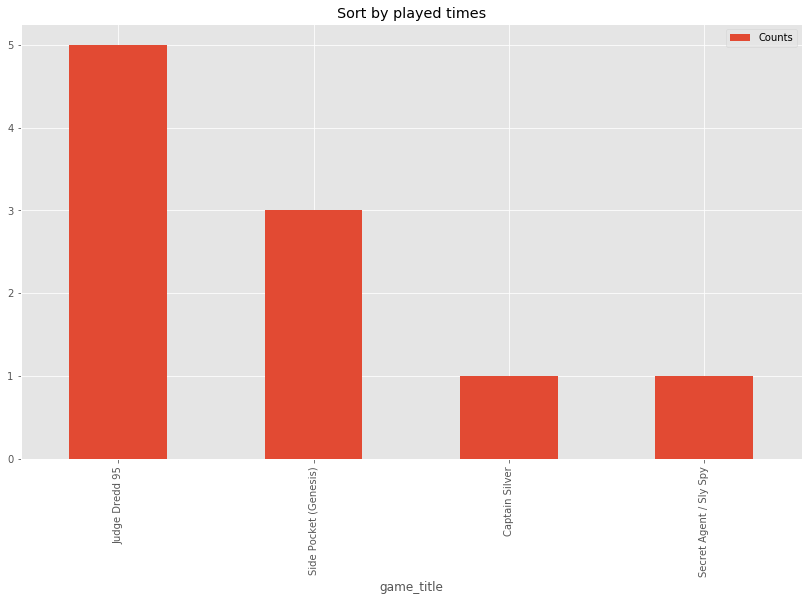

In [373]:
df3.plot.bar(x='game_title', y='Counts', title='Sort by played times')

### Most played game by cumulative played time

In [374]:
df.head()

,game_title,play_start,play_end,log_at,log_acnet,log_elastic,play_duration,1p_buttons,1p_joystick,1p_spinner,2p_buttons,2p_joystick,2p_spinner
0,Secret Agent / Sly Spy,2020-03-06 09:27:56+00:00,2020-03-06 09:28:26+00:00,2020-03-06 09:28:26+00:00,2020-03-06 09:31:03.513396+00:00,2020-03-06 09:31:03.981000+00:00,30,64,9,0,0,0,0
1,Side Pocket (Genesis),2020-03-06 09:28:41+00:00,2020-03-06 09:28:53+00:00,2020-03-06 09:28:53+00:00,2020-03-06 09:31:03.524053+00:00,2020-03-06 09:31:03.981000+00:00,12,7,0,0,0,0,0
2,Side Pocket (Genesis),2020-03-06 09:28:58+00:00,2020-03-06 09:29:42+00:00,2020-03-06 09:29:42+00:00,2020-03-06 09:31:03.534306+00:00,2020-03-06 09:31:03.981000+00:00,44,15,0,0,0,0,0
3,Side Pocket (Genesis),2020-03-06 09:29:46+00:00,2020-03-06 09:30:03+00:00,2020-03-06 09:30:03+00:00,2020-03-06 09:31:03.541187+00:00,2020-03-06 09:31:03.981000+00:00,17,10,0,0,0,0,0
4,Captain Silver,2020-03-06 09:17:51+00:00,2020-03-06 09:18:20+00:00,2020-03-06 09:18:20+00:00,2020-03-06 09:31:03.460813+00:00,2020-03-06 09:31:03.980000+00:00,29,3,7,0,0,0,0


In [375]:
#df2 = df.groupby('game_title').sum()['played_time']
df2 = df.groupby('game_title').agg({'play_duration': 'sum'}).rename(columns={'play_duration': 'total_played_time'})
df2

,total_played_time
game_title,
Captain Silver,29
Judge Dredd 95,125
Secret Agent / Sly Spy,30
Side Pocket (Genesis),73


In [376]:
df3 = df2.reset_index().sort_values('total_played_time', ascending=False).reset_index(drop=True)[['game_title', 'total_played_time']]
df3.head(10)
#print(type(df['played_time']))
#print(df['played_time'].astype(int)/1000000000)

,game_title,total_played_time
0,Judge Dredd 95,125
1,Side Pocket (Genesis),73
2,Secret Agent / Sly Spy,30
3,Captain Silver,29


In [377]:
#t = pd.to_timedelta(['01:12:34', '02:00:00', '03:00:00', '04:00:00'])
#print(t)
#>>> TimedeltaIndex(['01:12:34', '02:00:00', '03:00:00', '04:00:00'], dtype='timedelta64[ns]', freq=None)

#t.seconds
#>>> Int64Index([4354, 7200, 10800, 14400], dtype='int64')

In [378]:
#pd.to_timedelta(df['played_time'])

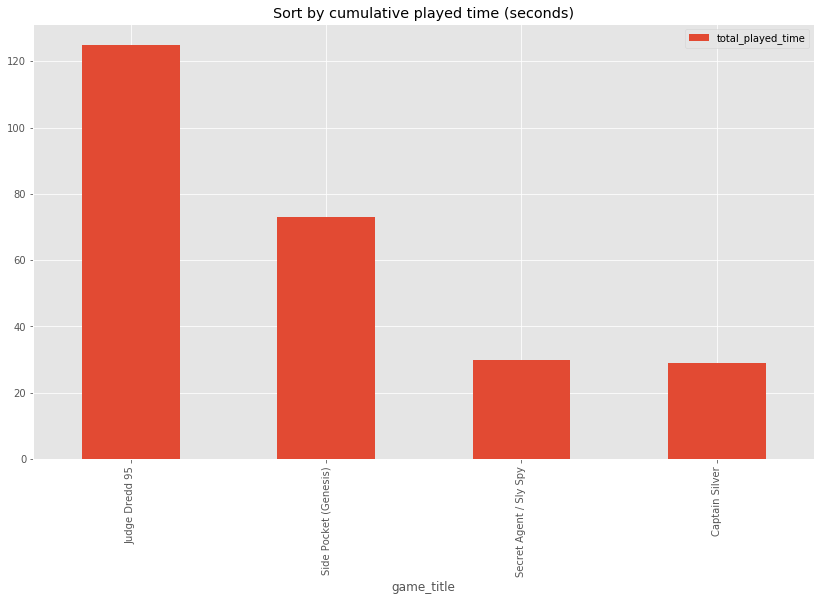

In [379]:
df3.plot.bar(x='game_title', y='total_played_time', title='Sort by cumulative played time (seconds)')

### Buttons, joysticks, spinners usage analysis

In [380]:
df2 = df.groupby('game_title').agg({'1p_buttons':'sum','1p_joystick':'sum','1p_spinner':'sum','2p_buttons':'sum','2p_joystick':'sum','2p_spinner':'sum'})  #.rename(columns={'played_time': 'total_played_time'})
df2

,1p_buttons,1p_joystick,1p_spinner,2p_buttons,2p_joystick,2p_spinner
game_title,,,,,,
Captain Silver,3,7,0,0,0,0
Judge Dredd 95,8,0,0,0,0,0
Secret Agent / Sly Spy,64,9,0,0,0,0
Side Pocket (Genesis),32,0,0,0,0,0


In [381]:
#df3 = df2.reset_index().sort_values('1p_buttons', ascending=False).reset_index(drop=True)[['game_title', '1p_buttons']]
df3 = df2.reset_index().sort_values('1p_buttons', ascending=False).reset_index(drop=True)
df3.head(10)

,game_title,1p_buttons,1p_joystick,1p_spinner,2p_buttons,2p_joystick,2p_spinner
0,Secret Agent / Sly Spy,64,9,0,0,0,0
1,Side Pocket (Genesis),32,0,0,0,0,0
2,Judge Dredd 95,8,0,0,0,0,0
3,Captain Silver,3,7,0,0,0,0


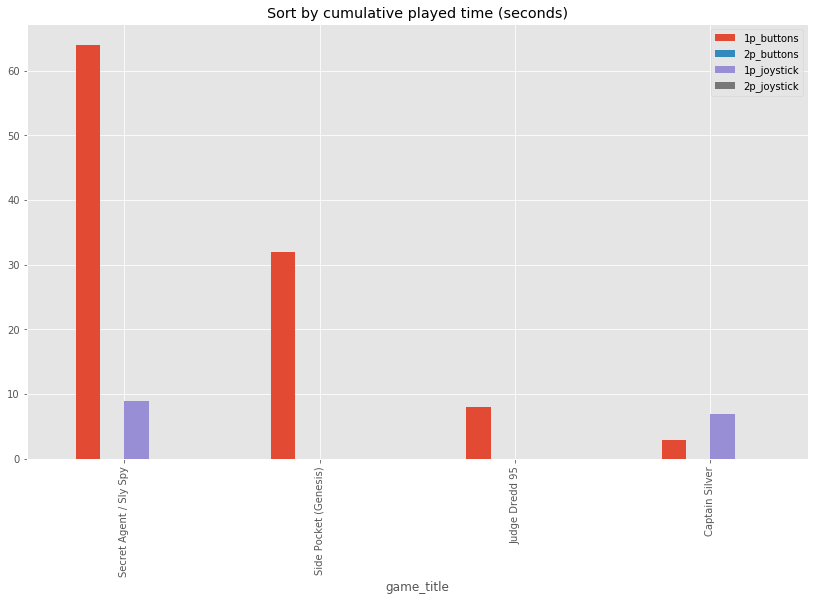

In [382]:
df3.plot.bar(x='game_title', y=['1p_buttons','2p_buttons','1p_joystick','2p_joystick'], title='Sort by cumulative played time (seconds)')

### Game played by date

In [383]:
#df['YYMMDD'] = df['play_start'].apply(lambda ts: str(ts.year)[2:] + "-" + str(ts.month) + "-" + str(ts.day))
df['YYMMDD'] = df['play_start'].apply(lambda ts: ts.date())

In [384]:
df[['game_title','YYMMDD','play_start']].head()

,game_title,YYMMDD,play_start
0,Secret Agent / Sly Spy,2020-03-06,2020-03-06 09:27:56+00:00
1,Side Pocket (Genesis),2020-03-06,2020-03-06 09:28:41+00:00
2,Side Pocket (Genesis),2020-03-06,2020-03-06 09:28:58+00:00
3,Side Pocket (Genesis),2020-03-06,2020-03-06 09:29:46+00:00
4,Captain Silver,2020-03-06,2020-03-06 09:17:51+00:00


In [385]:
#df2 = df.groupby('year_month').count().rename(columns={'uuid': 'Counts'})
df2 = df.groupby('YYMMDD').agg({'play_duration': 'count'}).rename(columns={'play_duration': 'Counts'})
df3 = df2.reset_index().sort_values('YYMMDD', ascending=True).reset_index(drop=True)[['YYMMDD', 'Counts']]
df3.head(10)

,YYMMDD,Counts
0,2020-03-06,10


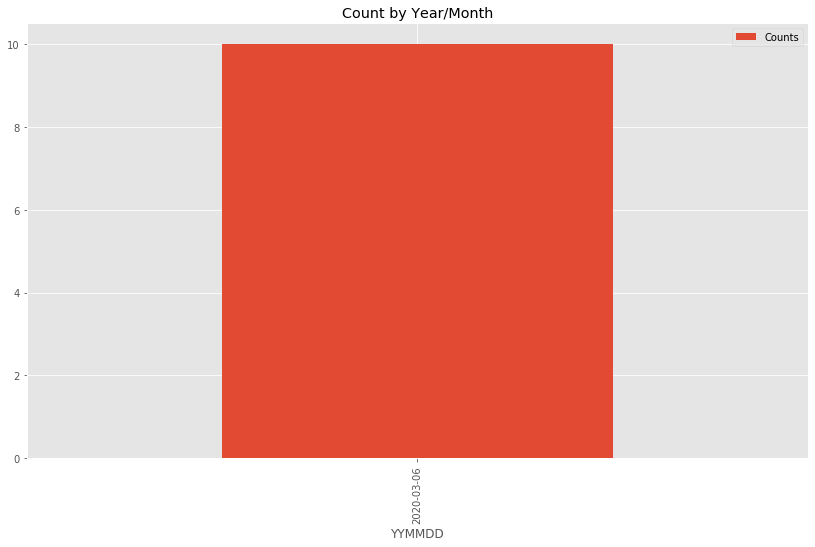

In [386]:
df3.plot.bar(x='YYMMDD', y='Counts', title='Count by Year/Month')